In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import re
import os

C:\Users\Krist\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
def getStatistics(files):
    if files == 1:
        filesForProcessing = availableFiles[:]
        
    elif isinstance(files,list):
        filesForProcessing = files[:]
    else:
        print("Incorrect format - please specify either a list or '1'")
    
    for element in filesForProcessing:
        print("-----------------------------------------------------------------------------------------------")
        print("The file being processed is: %s" % element)
        
        with open(path + "/"+element,"r") as file:
            temp = file.readlines()

        tempClean = [re.sub("[\n ]","",i) for i in temp]

        if len(tempClean[0]) == 1:

            tempClean = [int(i) for i in tempClean]

            uniqueVals, counts = np.unique(tempClean,return_counts = True)# Perhaps should listOfObs be sorted?

            if len(uniqueVals) > 50:
                print("\nThere are more than 50 unique values, so a histogram over the values are shown.")
#                     answer = input("There are more than 50 unique values, do you want to see them? ")

#                     if (answer == 'yes') or (answer == 'Yes'):
#                         print("The unique values and their frequency count, presented as {unique Value: Count}, are:\n")
#                         print({uniqueVal:count for uniqueVal,count in zip(uniqueVals,counts)},"\n")
                plt.hist(tempClean)
                plt.title("Distribution of the data")
                plt.show()
            else:
                print("\nThe unique values and their frequency count, presented as {unique Value: Count}, are:\n")
                print({uniqueVal:count for uniqueVal,count in zip(uniqueVals,counts)},"\n")

        else:

            tempClean = [re.split(",",i) for i in tempClean]

            lenOfElements = len(tempClean[0])

            database = [[] for i in np.arange(lenOfElements)]

            # Dividing in the observations
            for observation in tempClean:
                for partial in enumerate(observation):

                    database[partial[0]].append(int(partial[1]))

            # Getting information on the content of each list in the database.
            print("\nThe file contains %i separate streams of values." % lenOfElements)
            for listOfObs in database:
                uniqueVals, counts = np.unique(listOfObs,return_counts = True)# Perhaps should listOfObs be sorted?

                if (all(counts == 1)):
                    answer = input("\nAll values of the variable currently being processed is equal to one, which indiates\
that the values are numberic of other values. Do you want to disregard the processing of these values? ")
                    if (answer == 'no') or (answer == 'No'):
                        print({uniqueVal:count for uniqueVal,count in zip(uniqueVals,counts)},"\n")

                else:
                    if len(uniqueVals) > 50:
#                             answer = input("There are more than 50 unique values, do you want to see them? ")

#                             if (answer == 'yes') or (answer == 'Yes'):
#                                 print("The unique values and their frequency count, presented as {unique Value: Count}, are:\n")
#                                 print({uniqueVal:count for uniqueVal,count in zip(uniqueVals,counts)},"\n")
                        print("\nThere are more than 50 unique values, so a histogram over the values are shown.")
                        plt.hist(listOfObs)
                        plt.title("Distribution of the data")
                        plt.show()
                    else:
                        print("\nThe unique values and their frequency count, presented as {unique Value: Count}, are:\n")
                        print({uniqueVal:count for uniqueVal,count in zip(uniqueVals,counts)},"\n")

In [3]:
availableFolders = {}
folderCount = 0

for element in os.listdir("../../Exported_Data"):#os.listdir("../Assets/Exported_Data"):
    if ("txt" not in element) and ("meta" not in element):
        availableFolders[folderCount] = element
        folderCount += 1
        

In [325]:
print("The available folders, containing the data of interest, are:")
availableFolders

The available folders, containing the data of interest, are:


{0: 'BaseEnvironmentNoCurriculum',
 1: 'BaseEnvironmentNoCurriculum-1.1-0',
 2: 'BaseEnvironmentNoCurriculum-1.1.1-0',
 3: 'BaseEnvironmentNoCurriculum-1.2-0',
 4: 'CcCLStaticDynamic-1.8',
 5: 'CLStaticDynamicObstacles-1.0',
 6: 'CLStaticDynamicObstacles-1.0.1',
 7: 'CLStaticDynamicObstacles-1.0.2',
 8: 'CLStaticDynamicObstacles-1.1',
 9: 'CLStaticDynamicObstacles-1.2',
 10: 'CLStaticDynamicObstacles-1.3',
 11: 'CLStaticDynamicObstacles-1.4',
 12: 'CLStaticDynamicObstacles-1.5',
 13: 'CLStaticDynamicObstacles-1.6',
 14: 'CLStaticDynamicObstacles-1.7',
 15: 'CLStaticDynamicObstacles-1.8',
 16: 'CLStaticDynamicVS3',
 17: 'CLStaticDynamicVS6',
 18: 'CLStaticDynamicVS6-1',
 19: 'CurriculumLearning',
 20: 'RewardShaping-1.0',
 21: 'RewardShaping-1.1',
 22: 'RewardShaping-1.2'}

In [190]:
path = "../../Exported_Data/"+availableFolders[21]# <- Choose the folders from above

## Statistics on the content of the files in the folder

In [13]:
availableFiles = [ele for ele in os.listdir(path) if "meta" not in ele]
print("The available files are: ")
availableFiles

The available files are: 


['posCount.txt', 'sensorCloudCount.txt', 'stepsToGoal.txt']

-----------------------------------------------------------------------------------------------
The file being processed is: posCount.txt

The unique values and their frequency count, presented as {unique Value: Count}, are:

{0: 10921, 1: 1350} 

-----------------------------------------------------------------------------------------------
The file being processed is: sensorCloudCount.txt

The file contains 2 separate streams of values.

The unique values and their frequency count, presented as {unique Value: Count}, are:

{0: 12271} 


The unique values and their frequency count, presented as {unique Value: Count}, are:

{0: 3046, 1: 9225} 

-----------------------------------------------------------------------------------------------
The file being processed is: stepsToGoal.txt

The file contains 3 separate streams of values.

The unique values and their frequency count, presented as {unique Value: Count}, are:

{0: 3046, 1: 9225} 


There are more than 50 unique values, so a hist

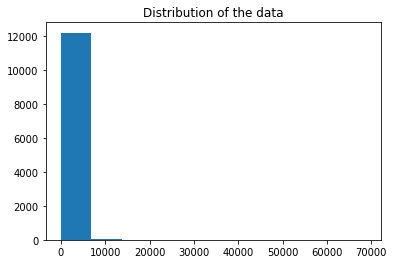


The unique values and their frequency count, presented as {unique Value: Count}, are:

{0: 12271} 



In [14]:
# List the files you want to see statistics on as a list, or enter "1" to get statistics for all files.
getStatistics(1)

### Looking closer at the number of steps taken by the agent in the _crowded area_.

In [25]:
# Reading in the data.
with open(path+"/stepsCA.txt","r") as file:
    content = file.readlines()

In [26]:
# The content is as follows: The first number is the number recorded from the AgentAction function and the second number is the 
# number recorded from the AgentObservation function.

# Cleaning and separating the two streams of data

steps_obs,steps_act = [],[]

for obs in content:
    cleanObs = re.split(",",re.sub("\n","",obs))
    
    steps_act.append(int(cleanObs[0]))
    steps_obs.append(int(cleanObs[1]))

steps_act = np.array(steps_act)
steps_obs = np.array(steps_obs)

if len(steps_act) != len(steps_obs):
    print("The number of observations in steps_act are: %i" % len(steps_act))
    print("The number of observations in steps_obs are: %i" % len(steps_obs))
else:
    print("The number of observations in both are: %i" % len(steps_act))

The number of observations in both are: 1365


In [52]:
sum(steps_act)

153401

In [76]:
pre_batch = 0
batch_means = []
step = int(len(steps_act)/10)

for batch in np.arange(step,len(steps_act),step=step):
    
    batch_means.append(steps_act[pre_batch:batch].mean())
    pre_batch += step

In [77]:
batch_means

[40.41968911917098,
 29.93782383419689,
 35.27979274611399,
 31.979274611398964,
 25.098445595854923,
 24.487046632124354,
 25.2279792746114,
 24.373056994818654,
 27.05699481865285,
 23.202072538860104]

## Basic Learning & Full SetUp No Curriculum

In [5]:
os.listdir("../../summaries_for_processing/GoalBrain_4_2/csv_output")

['BasicLearning-0.csv',
 'BasicLearning-0.txt',
 'CurriculumLearning-0.csv',
 'CurriculumLearning-0.txt',
 'FullTrainingSession-1.4-0.csv',
 'FullTrainingSession-1.4-0.txt',
 'FullTrainingSession-1.4.1-0.csv',
 'FullTrainingSession-1.4.1-0.txt',
 'FullTrainingSession-1.4.2-0.csv',
 'FullTrainingSession-1.4.2-0.txt',
 'FullTrainingSession-1.4.3-0.csv',
 'FullTrainingSession-1.4.3-0.txt',
 'FullTrainingSession-1.4.4-0.csv',
 'FullTrainingSession-1.4.4-0.txt',
 'FullTrainingSession-1.4.5-0.csv',
 'FullTrainingSession-1.4.5-0.txt']

In [95]:
BL_content_csv = pd.read_csv("../../summaries_for_processing/GoalBrain_4_2/csv_output/BasicLearning-0.csv", index_col=0)
FS_content_csv = pd.read_csv("../../summaries_for_processing/GoalBrain_4_2/csv_output/FullSetUpNoCL-1.0-0.csv", index_col=0)
FS_content_csv = FS_content_csv.iloc[:,0:100]

In [83]:
BL_content_csv

,2000.0,4000.0,6000.0,8000.0,10000.0,12000.0,14000.0,16000.0,18000.0,20000.0,...,182000.0,184000.0,186000.0,188000.0,190000.0,192000.0,194000.0,196000.0,198000.0,200000.0
1,-0.893448,-1.128152,-1.085956,-1.140089,-0.959375,-0.711800,-0.954091,-0.878300,0.053875,-0.943167,...,0.897396,0.897969,0.912909,0.908538,0.892228,0.889091,0.903921,0.901489,0.895765,0.902600
2,67.689651,86.043480,57.911766,70.321426,69.464287,76.720001,90.727272,79.320000,98.449997,137.266663,...,41.041668,40.812500,34.836365,36.584908,43.108696,44.363636,38.431374,39.404255,41.693878,38.959999
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.102150,0.321829,0.348755,0.269092,0.273218,0.246014,0.242299,0.299914,...,0.009923,0.009724,0.008158,0.008350,0.009987,0.013426,0.009205,0.009147,0.009962,0.008825
5,1.418938,1.418938,1.420066,1.421882,1.421882,1.422696,1.422941,1.422493,1.420177,1.420177,...,1.353981,1.353981,1.350850,1.350659,1.349753,1.347712,1.347712,1.346719,1.346232,1.346167
6,0.000299,0.000298,0.000297,0.000296,0.000295,0.000293,0.000292,0.000291,0.000290,0.000289,...,0.000191,0.000190,0.000189,0.000188,0.000187,0.000185,0.000184,0.000183,0.000182,0.000181
7,-0.085922,-0.077174,-0.105501,-0.122261,-0.144158,-0.167824,-0.196744,-0.201990,-0.135411,-0.199345,...,0.753892,0.745801,0.768372,0.761534,0.741385,0.747904,0.762253,0.743216,0.753643,0.758598


In [85]:
step = np.array(BL_content_csv.columns).astype(float)

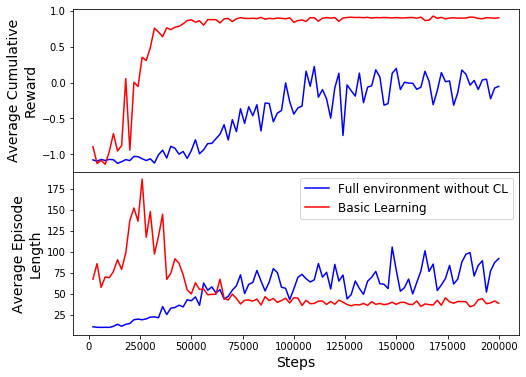

In [112]:
fig,(ax,bx) = plt.subplots(2,1,figsize=(8,6),sharex=True,gridspec_kw = {'wspace':0, 'hspace':0})
ax.plot(step,FS_content_csv.loc[1],color="b")
ax.plot(step,BL_content_csv.loc[1],c = 'r')

ax.set_ylabel("Average Cumulative\nReward",fontsize=14)

bx.plot(step,FS_content_csv.loc[2],color='b',label="Full environment without CL")
bx.plot(step,BL_content_csv.loc[2],color='r',label='Basic Learning')
bx.set_ylabel("Average Episode\nLength",fontsize=14)
bx.set_xlabel("Steps",fontsize = 14)
bx.legend(fontsize=12)
# plt.savefig("Graphs/DifferentLooksOfLearning.jpg",bbox_inches="tight")
plt.show()

## First training session using curriculum learning

In [11]:
firstCL_csv = pd.read_csv("../../summaries_for_processing/GoalBrain_4_2/csv_output/CurriculumLearning-0.csv", index_col=0,na_values=0)

In [12]:
firstCL_csv = firstCL_csv.fillna(0)

In [13]:
firstCL_csv

,2000.0,4000.0,6000.0,8000.0,10000.0,12000.0,14000.0,16000.0,18000.0,20000.0,...,982000.0,984000.0,986000.0,988000.0,990000.0,992000.0,994000.0,996000.0,998000.0,1000000.0
1,-0.967770,-0.968125,-0.905000,-0.837167,-1.032407,-0.520761,-0.723816,-0.929167,-0.917000,-0.656667,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00
2,51.945946,62.250000,56.117645,68.199997,72.222221,86.565216,100.052635,105.000000,286.799988,196.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000e+00,3.000000e+00
4,0.000000,0.000000,0.118596,0.420656,0.436509,0.384249,0.377563,0.388973,0.786997,0.502139,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00
5,1.418938,1.418938,1.420179,1.422479,1.422479,1.421532,1.421211,1.420866,1.418728,1.418728,...,1.307127,1.307120,1.307098,1.307098,1.307086,1.307080,1.307080,1.307080,1.307080e+00,1.307080e+00
6,0.000300,0.000299,0.000298,0.000298,0.000297,0.000297,0.000296,0.000295,0.000295,0.000294,...,0.000006,0.000005,0.000004,0.000004,0.000003,0.000003,0.000002,0.000001,8.999506e-07,2.999507e-07
7,0.130058,0.152667,0.145008,0.103606,0.064751,0.082076,0.101633,0.082155,0.101976,0.076790,...,0.127381,0.082667,0.121396,0.039887,0.033598,0.011775,0.009039,0.028154,8.652220e-03,7.512131e-03


In [14]:
step_CL = np.array(firstCL_csv.columns).astype(float)

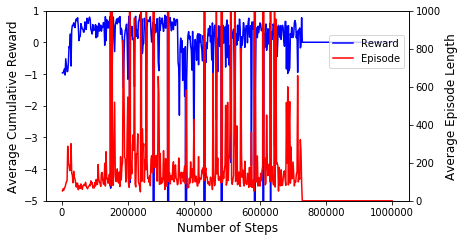

In [20]:
fig,ax1 = plt.subplots(figsize=(6.5,3.5))
plt1 = ax1.plot(step_CL,firstCL_csv.loc[1],color="b",label="Reward")
ax1.set_xlabel("Number of Steps",fontsize = 12)
ax1.set_ylabel("Average Cumulative Reward",fontsize=12)
ax1.set_ylim((-5,1))
# ax1.set_yscale('log')
ax2 = ax1.twinx()
plt2 = ax2.plot(step_CL,firstCL_csv.loc[2],color='r',label="Episode")
ax2.set_ylabel("Average Episode Length",fontsize=12)
ax2.set_ylim((0,1000))
# ax2.set_yscale('log')
# Legends
plts = plt1 + plt2
labels = [l.get_label() for l in plts]
plt.legend(plts,labels,loc=0,bbox_to_anchor=(1,0.9))#bbox_to_anchor=(1.35,1)

# plt.savefig("Graphs/BasicLearningEnvironment.jpg",bbox_inches="tight")
plt.show()

### The effect of restricting the maximum steps

## CLStaticDynamicObstacles

In [125]:
path

'../..//Exported_Data/CLStaticDynamicObstacles-1.0.1'

In [145]:
# Reading in the data.
with open(path+"/stepsToGoal.txt","r") as file:
    content = file.readlines()

In [146]:
# The content is as follows: The first number is the number recorded from the AgentAction function and the second number is the 
# number recorded from the AgentObservation function.

# Cleaning and separating the two streams of data

#### For no-maximum-steps data ########### 
# goalNoMax,episodeLengthNoMax,difficultAreaNoMax = [],[],[]

# for obs in content:
#     cleanObs = re.split(",",re.sub("\n","",obs))
    
#     episodeLengthNoMax.append(int(cleanObs[1]))
#     goalNoMax.append(int(cleanObs[0]))
#     difficultAreaNoMax.append(int(cleanObs[2]))
    
# if len(episodeLengthNoMax) != len(goalNoMax):
#     print("The number of observations in steps_act are: %i" % len(episodeLengthNoMax))
#     print("The number of observations in steps_obs are: %i" % len(goalNoMax))
# else:
#     print("The number of observations in both are: %i" % len(episodeLengthNoMax))
    
# #### For maximum-steps data ##############
goal,episodeLength,difficultArea = [],[],[]

for obs in content:
    cleanObs = re.split(",",re.sub("\n","",obs))
    
    episodeLength.append(int(cleanObs[1]))
    goal.append(int(cleanObs[0]))
    difficultArea.append(int(cleanObs[2]))
    
if len(episodeLength) != len(goal):
    print("The number of observations in steps_act are: %i" % len(episodeLength))
    print("The number of observations in steps_obs are: %i" % len(goal))
else:
    print("The number of observations in both are: %i" % len(episodeLength))

The number of observations in both are: 7736


## No maximum steps

In [128]:
max(episodeLengthNoMax)

34223

In [28]:
min(episodeLengthNoMax)

1

In [29]:
len(episodeLengthNoMax)

7487

In [129]:
# Distribution of number of episodes where target is located in the difficult areas
stateDANoMax, shareDANoMax = np.unique(np.array(difficultAreaNoMax),return_counts=True)
shareDANoMax[1]/sum(shareDANoMax)

0.0964338186189395

In [130]:
shareDANoMax

array([6765,  722], dtype=int64)

In [131]:
# Keeping those where the target actually is located in the difficult area
daObsNoMax = np.array(difficultAreaNoMax)[np.array(difficultAreaNoMax)==1]
goalDAObsNoMax = np.array(goalNoMax)[np.array(difficultAreaNoMax)==1]
episodeLenDAObsNoMax = np.array(episodeLengthNoMax)[np.array(difficultAreaNoMax)==1]

In [178]:
goalDANoMaxFull = [1 if (i == 1) and (j ==1) else 0 for i,j in zip(difficultAreaNoMax,goalNoMax)]
goalDANoMax = [1 if (i == 1) and (j ==1) else 0 for i,j in zip(daObsNoMax,goalDAObsNoMax) ]

In [136]:
stateNoMax,freqNoMax = np.unique(goalDANoMax,return_counts=True)

In [137]:
freqNoMax

array([349, 373], dtype=int64)

In [138]:
len(episodeLenDAObsNoMax)

722

In [139]:
episodeLenDAObsNoMax.mean()

776.6620498614958

In [140]:
# Just a check
# (freqNoMax[1]/sum(freqNoMax))*(shareDANoMax[1]/sum(shareDANoMax))

In [141]:
tableNoMax = pd.DataFrame([shareDANoMax,freqNoMax],index=['TLDA','GR'],columns=[0,1])

In [142]:
tableNoMax['Shares'] = np.round([shareDANoMax[1]/sum(shareDANoMax), freqNoMax[1]/sum(freqNoMax)],3)

In [143]:
tableNoMax

,0,1,Shares
TLDA,6765,722,0.096
GR,349,373,0.517


## Maximum steps equal to 4000

In [147]:
max(episodeLength)

4000

In [148]:
len(episodeLength)

7736

In [149]:
min(episodeLength)

1

In [150]:
len(np.array(episodeLength)[np.array(episodeLength)>=4000])/len(episodeLength)

0.0031023784901758012

In [151]:
# Distribution of number of episodes where target is located in the difficult areas
stateDA, shareDA = np.unique(np.array(difficultArea),return_counts=True)
shareDA[1]/sum(shareDA)

0.1062564632885212

In [152]:
# Keeping those where the target actually is located in the difficult area
daObs = np.array(difficultArea)[np.array(difficultArea)==1]
goalDAObs = np.array(goal)[np.array(difficultArea)==1]
episodeLenDA = np.array(episodeLength)[np.array(difficultArea)==1]

In [180]:
goalDAFull = [1 if (i == 1) and (j ==1) else 0 for i,j in zip(difficultArea,goal) ]
goalDA = [1 if (i == 1) and (j ==1) else 0 for i,j in zip(daObs,goalDAObs) ]

In [154]:
state,freq = np.unique(goalDA,return_counts=True)

In [155]:
freq

array([372, 450], dtype=int64)

In [156]:
freq[1]/sum(freq)

0.5474452554744526

In [157]:
len(episodeLenDA)

822

In [158]:
episodeLenDA.mean()/episodeLenDAObsNoMax.mean()

0.8542389678404727

In [159]:
tableMax = pd.DataFrame([shareDA,freq],index=['TLDA','GR'],columns=[0,1])

In [160]:
tableMax['Shares'] = np.round([shareDA[1]/sum(shareDA), freq[1]/sum(freq)],3)

In [161]:
tableMax

,0,1,Shares
TLDA,6914,822,0.106
GR,372,450,0.547


In [162]:
# Just a check
# (freq[1]/sum(freq))*(shareDA[1]/sum(shareDA))

In [163]:
tableNoMax['Shares'].loc['TLDA']

0.096

In [164]:
tableMax['Shares'].loc['TLDA']

0.106

In [165]:
tableNoMax['Shares'].loc['TLDA']/tableMax['Shares'].loc['TLDA']

0.9056603773584906

In [166]:
tableMax['Shares'].loc['GR']*tableNoMax['Shares'].loc['TLDA']/tableMax['Shares'].loc['TLDA']

0.4953962264150944

In [167]:
((tableMax['Shares'].loc['GR']*tableNoMax['Shares'].loc['TLDA']/tableMax['Shares'].loc['TLDA'])\
 -tableNoMax['Shares'].loc['GR'])/tableNoMax['Shares'].loc['GR']

-0.04178679610233194

In [168]:
((tableMax['Shares'].loc['GR']*tableNoMax['Shares'].loc['TLDA']/tableMax['Shares'].loc['TLDA'])\
 -tableNoMax['Shares'].loc['GR'])

-0.021603773584905617

In [169]:
table = tableNoMax.append(tableMax)

In [170]:
table

,0,1,Shares
TLDA,6765,722,0.096
GR,349,373,0.517
TLDA,6914,822,0.106
GR,372,450,0.547


ValueError: x and y must have same first dimension, but have shapes (7736,) and (822,)

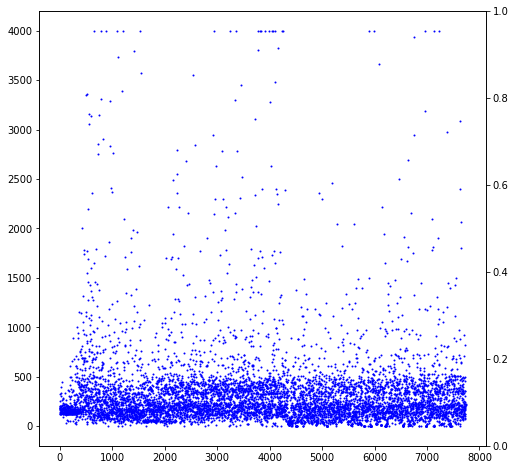

In [171]:
fig,ax = plt.subplots(figsize=(8,8))

ax.plot(np.arange(len(episodeLength)),episodeLength, linewidth=0, marker="o",markersize=1,c='blue')
bx = ax.twinx()
bx.plot(np.arange(len(episodeLength)),goalDA,linewidth=0.1)
plt.xlabel("Episodes",fontsize=14)
plt.ylabel('Number of steps',fontsize=14)
# plt.savefig('graphs/numberOfStepsPerEpisode.jpg',bbox_inches='tight')
plt.show()

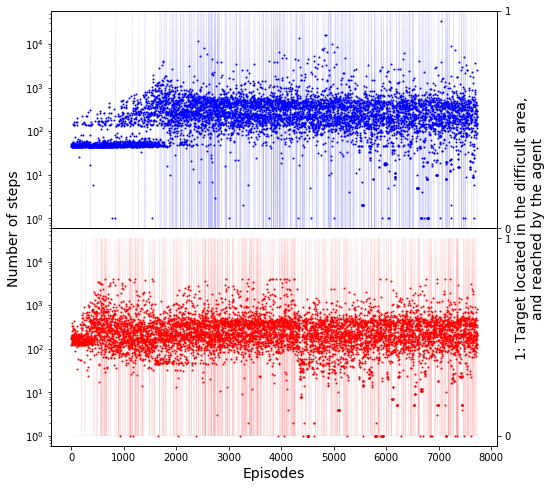

In [189]:
## NOTE: CLStaticDynamicObstacles-1.7 and CLStaticDynamicObstacles.1.0.1 where used

fig,(ax,bx) = plt.subplots(2,1,figsize=(8,8),sharey=True,gridspec_kw = {'wspace':0, 'hspace':0})

ax.plot(np.arange(len(episodeLengthNoMax)),episodeLengthNoMax, linewidth=0,
        marker="o",markersize=1,c='blue')
ax2 = ax.twinx()
ax2.plot(np.arange(len(episodeLengthNoMax)),goalDANoMaxFull,linewidth=0.05,c="blue")

# Plotting max-step-4000 obs
bx.plot(np.arange(len(episodeLength)),episodeLength, linewidth=0,
        marker="o",markersize=1,c='red')
bx2 = bx.twinx()
bx2.plot(np.arange(len(episodeLength)),goalDAFull,linewidth=0.05,c='red')

ax2.locator_params(axis='y', nbins=1)
# ax.set_ylim(0,40000)
bx2.locator_params(axis='y', nbins=1)
ax.set_yscale('log')
bx.set_yscale('log')
bx.set_xlabel('Episodes',fontsize=14)
ax.set_ylabel('Number of steps',fontsize=14,position=(1,0))
ax2.set_ylabel('1: Target located in the difficult area,\nand reached by the agent',
               fontsize=14,position=(1,0))
ax2.set_ylim((0,1))
# plt.savefig('graphs/numberOfStepsPerEpisode_new.jpg',bbox_inches='tight')
plt.show()

In [261]:
maxStepsH = []
lostObsH = []
maxStepsL = []
lostObsL = []
for treshold in np.arange(100,1100,100):
    #treshold = 10000
#     print("Number of observations above %i: %i, equivalent to %.4f of the total observations" % (treshold,\
#                                                                                                  sum(np.greater(np.array(episodeLength),treshold))\
#                                                                                                  ,sum(np.greater(np.array(episodeLength),treshold))/len(episodeLength)))
    
    print("Number of observations above %i: %i, equivalent to %.4f of the total observations" % (treshold,\
                                                                                                 len(np.array(episodeLengthNoMax)[np.array(episodeLengthNoMax)>=treshold])\
                                                                                                 ,len(np.array(episodeLengthNoMax)[np.array(episodeLengthNoMax)>=treshold])/len(episodeLengthNoMax)))
    maxStepsL.append(treshold)
#     lostObsL.append(sum(np.greater(np.array(episodeLength),treshold))/len(episodeLength))
    lostObsL.append(len(np.array(episodeLengthNoMax)[np.array(episodeLengthNoMax)>=treshold])/len(episodeLengthNoMax))
for treshold in np.arange(1000,11000,1000):
    #treshold = 10000
#     print("Number of observations above %i: %i, equivalent to %.4f of the total observations" % (treshold,\
#                                                                                                  sum(np.greater(np.array(episodeLength),treshold))\
#                                                                                                  ,sum(np.greater(np.array(episodeLength),treshold))/len(episodeLength)))
    print("Number of observations above %i: %i, equivalent to %.4f of the total observations" % (treshold,\
                                                                                                 len(np.array(episodeLengthNoMax)[np.array(episodeLengthNoMax)>=treshold])\
                                                                                                 ,len(np.array(episodeLengthNoMax)[np.array(episodeLengthNoMax)>=treshold])/len(episodeLengthNoMax)))
    maxStepsH.append(treshold)

#     lostObsH.append(sum(np.greater(np.array(episodeLength),treshold))/len(episodeLength))
    lostObsH.append(len(np.array(episodeLengthNoMax)[np.array(episodeLengthNoMax)>=treshold])/len(episodeLengthNoMax))

Number of observations above 100: 5460, equivalent to 0.7293 of the total observations
Number of observations above 200: 4001, equivalent to 0.5344 of the total observations
Number of observations above 300: 2777, equivalent to 0.3709 of the total observations
Number of observations above 400: 1887, equivalent to 0.2520 of the total observations
Number of observations above 500: 1094, equivalent to 0.1461 of the total observations
Number of observations above 600: 686, equivalent to 0.0916 of the total observations
Number of observations above 700: 495, equivalent to 0.0661 of the total observations
Number of observations above 800: 383, equivalent to 0.0512 of the total observations
Number of observations above 900: 312, equivalent to 0.0417 of the total observations
Number of observations above 1000: 261, equivalent to 0.0349 of the total observations
Number of observations above 1000: 261, equivalent to 0.0349 of the total observations
Number of observations above 2000: 97, equivale

In [262]:
pd.DataFrame([np.array(lostObsL).round(3),
             np.array(maxStepsH).astype(int),
             np.array(lostObsH).round(3)],columns=maxStepsL)

,100,200,300,400,500,600,700,800,900,1000
0,0.729,0.534,0.371,0.252,0.146,0.092,0.066,0.051,0.042,0.035
1,1000.000,2000.000,3000.000,4000.000,5000.000,6000.000,7000.000,8000.000,9000.000,10000.000
2,0.035,0.013,0.008,0.005,0.003,0.002,0.002,0.001,0.001,0.001


### Extracting the data from TensorBoard

In [264]:
fileDict = {i: file for i,file in enumerate(os.listdir("../../summaries_for_processing/GoalBrain_4_2/csv_output"))}
fileDict

{0: 'BaseEnvironment-1.2.11-0.csv',
 1: 'BaseEnvironment-1.2.11-0.txt',
 2: 'BaseEnvironment-1.2.12-0.csv',
 3: 'BaseEnvironment-1.2.12-0.txt',
 4: 'BaseEnvironment-1.2.13-0.csv',
 5: 'BaseEnvironment-1.2.13-0.txt',
 6: 'BaseEnvironment-1.2.14-0.csv',
 7: 'BaseEnvironment-1.2.14-0.txt',
 8: 'BaseEnvironment-1.2.15-0.csv',
 9: 'BaseEnvironment-1.2.15-0.txt',
 10: 'BaseEnvironment-1.2.16-0.csv',
 11: 'BaseEnvironment-1.2.16-0.txt',
 12: 'BaseEnvironment-1.2.17-0.csv',
 13: 'BaseEnvironment-1.2.17-0.txt',
 14: 'BasicLearning-0.csv',
 15: 'BasicLearning-0.txt',
 16: 'CLStaticDynamicObstacles-1.0-0.csv',
 17: 'CLStaticDynamicObstacles-1.0-0.txt',
 18: 'CLStaticDynamicObstacles-1.1-0.csv',
 19: 'CLStaticDynamicObstacles-1.1-0.txt',
 20: 'CLStaticDynamicObstacles-1.2-0.csv',
 21: 'CLStaticDynamicObstacles-1.2-0.txt',
 22: 'CLStaticDynamicObstacles-1.3-0.csv',
 23: 'CLStaticDynamicObstacles-1.3-0.txt',
 24: 'CLStaticDynamicObstacles-1.4-0.csv',
 25: 'CLStaticDynamicObstacles-1.4-0.txt',
 26: '

In [266]:
# CLStaticDynamicObstacles without maximum steps
CLSDO_WOMS_csv = pd.read_csv("../../summaries_for_processing/GoalBrain_4_2/csv_output/"+fileDict[32], index_col=0,na_values=0).fillna(0)
# CLStaticDynamicObstacles with maximum steps (10000)
CLSDO_WMS_csv = pd.read_csv("../../summaries_for_processing/GoalBrain_4_2/csv_output/"+fileDict[28], index_col=0,na_values=0).fillna(0)

In [268]:
clippedCLSDO_WOMS = CLSDO_WOMS_csv.iloc[0:3,0:250]

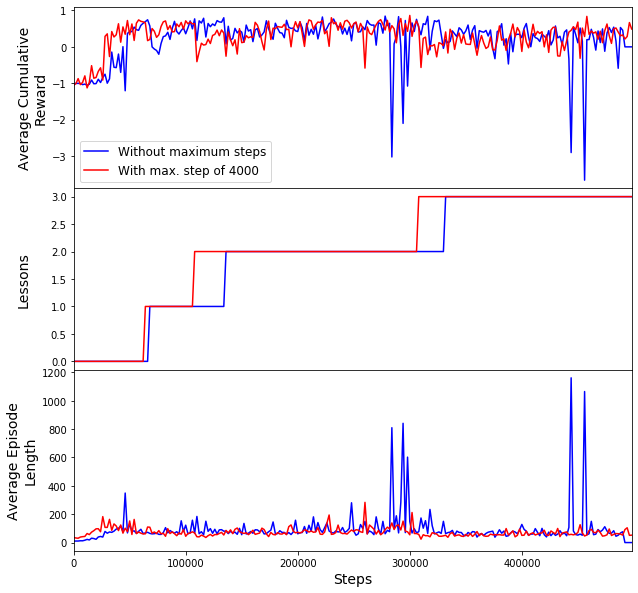

In [270]:
fig,(ax,bx,cx) = plt.subplots(3,1,figsize=(10,10),gridspec_kw = {'wspace':0, 'hspace':0})#sharex=True
plt.locator_params(axis='x', nbins=5)

# Plotting the ACR
clippedCLSDO_WOMS.loc[[1]].T.plot(ax=ax,c='blue')
CLSDO_WMS_csv.loc[1].T.plot(ax=ax,c='red')

# Second plot, changes in lessons
clippedCLSDO_WOMS.loc[3].T.plot(ax=bx,c='blue')
CLSDO_WMS_csv.loc[3].T.plot(ax=bx,c='red')

# Third plot, AEL
clippedCLSDO_WOMS.loc[[2]].T.plot(ax=cx,c="blue")
CLSDO_WMS_csv.loc[2].T.plot(ax=cx,c="red")

# Disabling the irrelvant x-axis
ax.get_xaxis().set_visible(False)
bx.get_xaxis().set_visible(False)

# Controling the tick labels
cx.set_xticklabels(np.arange(0,500000,100000).astype(str))

# Specifying the legends
ax.legend(['Without maximum steps','With max. step of 4000'],fontsize=12)#,bbox_to_anchor=(1.3,1)
cx.get_legend().remove()

# Add y-labels
ax.set_ylabel("Average Cumulative\nReward",fontsize=14)
bx.set_ylabel("Lessons\n ",fontsize=14)
cx.set_ylabel("Average Episode\nLength",fontsize=14)
cx.set_xlabel("Steps",fontsize=14)
# plt.savefig("graphs/EffectOfMaxSteps_new.jpg",bbox_inches="tight")
plt.show()

### Observation stacking

In [263]:
fileDict = {i: file for i,file in enumerate(os.listdir("../../summaries_for_processing/GoalBrain_4_2/csv_output"))}
fileDict

{0: 'CcCLStaticDynamic-1.8-0.csv',
 1: 'CcCLStaticDynamic-1.8-0.txt',
 2: 'CLStaticDynamicObstacles-1.0-0.csv',
 3: 'CLStaticDynamicObstacles-1.0-0.txt',
 4: 'CLStaticDynamicObstacles-1.1-0.csv',
 5: 'CLStaticDynamicObstacles-1.1-0.txt',
 6: 'CLStaticDynamicObstacles-1.2-0.csv',
 7: 'CLStaticDynamicObstacles-1.2-0.txt',
 8: 'CLStaticDynamicObstacles-1.3-0.csv',
 9: 'CLStaticDynamicObstacles-1.3-0.txt',
 10: 'CLStaticDynamicObstacles-1.4-0.csv',
 11: 'CLStaticDynamicObstacles-1.4-0.txt',
 12: 'CLStaticDynamicObstacles-1.6-0.csv',
 13: 'CLStaticDynamicObstacles-1.6-0.txt',
 14: 'CLStaticDynamicObstacles-1.7-0.csv',
 15: 'CLStaticDynamicObstacles-1.7-0.txt',
 16: 'CLStaticDynamicObstacles-1.8-0.csv',
 17: 'CLStaticDynamicObstacles-1.8-0.txt',
 18: 'CLStaticDynamicObstacles.1.0.1-0.csv',
 19: 'CLStaticDynamicObstacles.1.0.1-0.txt',
 20: 'CLStaticDynamicObstacles.1.0.2-0.csv',
 21: 'CLStaticDynamicObstacles.1.0.2-0.txt',
 22: 'CLStaticDynamicObstacles.1.5-0.csv',
 23: 'CLStaticDynamicObstac

In [265]:
# CLStaticDynamicObstacles without maximum steps
CLSDO_WOMS_csv = pd.read_csv("../../summaries_for_processing/GoalBrain_4_2/csv_output/"+fileDict[18], index_col=0,na_values=0).fillna(0)
# CLStaticDynamicObstacles with maximum steps (4000)
CLSDO_WMS_csv = pd.read_csv("../../summaries_for_processing/GoalBrain_4_2/csv_output/"+fileDict[14], index_col=0,na_values=0).fillna(0)
# Observation stackiing
CLSDO_WOMS_VS3 = pd.read_csv("../../summaries_for_processing/GoalBrain_4_2/csv_output/"+fileDict[24], index_col=0,na_values=0).fillna(0)
CLSDO_WOMS_VS6b = pd.read_csv("../../summaries_for_processing/GoalBrain_4_2/csv_output/"+fileDict[26], index_col=0,na_values=0).fillna(0)
CLSDO_WOMS_VS6g = pd.read_csv("../../summaries_for_processing/GoalBrain_4_2/csv_output/"+fileDict[28], index_col=0,na_values=0).fillna(0)

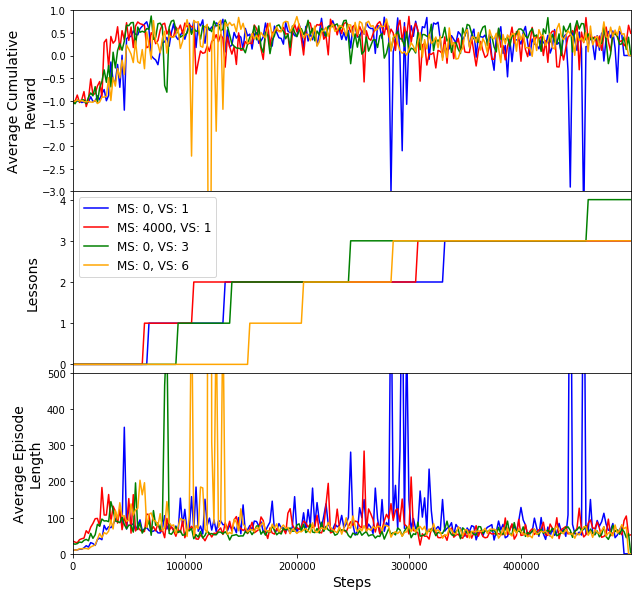

In [266]:
fig,(ax,bx,cx) = plt.subplots(3,1,figsize=(10,10),gridspec_kw = {'wspace':0, 'hspace':0})#sharex=True
plt.locator_params(axis='x', nbins=5)
bx.locator_params(axis='y', nbins=5)

# Plotting the ACR
CLSDO_WOMS_csv.loc[[1]].T.plot(ax=ax,c='blue')
CLSDO_WMS_csv.loc[1].T.plot(ax=ax,c='red')
CLSDO_WOMS_VS3.loc[[1]].T.plot(ax=ax,c='green')
# CLSDO_WOMS_VS6b.loc[[1]].T.plot(ax=ax,c='orange',linestyle='dashed')
CLSDO_WOMS_VS6g.loc[[1]].T.plot(ax=ax,c='orange')

# Second plot, changes in lessons
CLSDO_WOMS_csv.loc[3].T.plot(ax=bx,c='blue')
CLSDO_WMS_csv.loc[3].T.plot(ax=bx,c='red')
CLSDO_WOMS_VS3.loc[[3]].T.plot(ax=bx,c='green')
# CLSDO_WOMS_VS6b.loc[[3]].T.plot(ax=bx,c='orange',linestyle='dashed')
CLSDO_WOMS_VS6g.loc[[3]].T.plot(ax=bx,c='orange')

# Third plot, AEL
CLSDO_WOMS_csv.loc[[2]].T.plot(ax=cx,c="blue")
CLSDO_WMS_csv.loc[2].T.plot(ax=cx,c="red")
CLSDO_WOMS_VS3.loc[[2]].T.plot(ax=cx,c='green')
# CLSDO_WOMS_VS6b.loc[[2]].T.plot(ax=cx,c='orange',linestyle='dashed')
CLSDO_WOMS_VS6g.loc[[2]].T.plot(ax=cx,c='orange')

# Disabling the irrelvant x-axis
ax.get_xaxis().set_visible(False)
bx.get_xaxis().set_visible(False)

# Controling the tick labels
cx.set_xticklabels(np.arange(0,500000,100000).astype(str))

# Specifying the legends
bx.legend(['MS: 0, VS: 1','MS: 4000, VS: 1',
           'MS: 0, VS: 3','MS: 0, VS: 6'],fontsize=12)#,bbox_to_anchor=(1.3,1)
ax.get_legend().remove()
cx.get_legend().remove()

# Add y-labels
ax.set_ylabel("Average Cumulative\nReward",fontsize=14)
ax.set_ylim((-3,1))
bx.set_ylabel("Lessons\n ",fontsize=14)
cx.set_ylabel("Average Episode\nLength",fontsize=14)
cx.set_xlabel("Steps",fontsize=14)
cx.set_ylim((0,500))
# plt.savefig("graphs/EffectOfMaxSteps_new.jpg",bbox_inches="tight")
plt.show()

In [267]:
CLSDO_WMS_csv.columns = np.array(CLSDO_WMS_csv.columns).astype(float).astype(int)
CLSDO_WOMS_csv.columns = np.array(CLSDO_WOMS_csv.columns).astype(float).astype(int)
CLSDO_WOMS_VS3.columns = np.array(CLSDO_WOMS_VS3.columns).astype(float).astype(int)
CLSDO_WOMS_VS6g.columns = np.array(CLSDO_WOMS_VS6g.columns).astype(float).astype(int)

CLSDO_WMS_csv = CLSDO_WMS_csv.iloc[:,119:]
CLSDO_WOMS_csv = CLSDO_WOMS_csv.iloc[:,119:]
CLSDO_WOMS_VS3 = CLSDO_WOMS_VS3.iloc[:,119:]
CLSDO_WOMS_VS6g = CLSDO_WOMS_VS6g.iloc[:,119:]

In [268]:
CLSDO_WMS_csv.head()

,240000,242000,244000,246000,248000,250000,252000,254000,256000,258000,...,482000,484000,486000,488000,490000,492000,494000,496000,498000,500000
1,0.661290,0.487016,0.705000,0.729470,0.657981,0.517717,0.636875,0.682841,0.416023,0.643333,...,0.095183,0.491818,0.518952,0.405937,0.304167,0.327905,0.215278,0.284545,0.667564,0.491013
2,70.967743,63.258064,64.666664,59.727272,75.269234,88.565216,78.583336,90.500000,88.136360,76.000000,...,49.731709,57.818180,63.387096,62.625000,60.151516,52.621620,91.666664,104.363640,50.923077,52.243244
3,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
4,0.021434,0.018604,0.019736,0.017770,0.021942,0.023940,0.022349,0.024406,0.024931,0.021234,...,0.021113,0.021487,0.026431,0.025946,0.026627,0.021986,0.037691,0.039598,0.020018,0.018553
5,1.333932,1.332626,1.331769,1.331769,1.330825,1.330820,1.330755,1.330638,1.330638,1.329997,...,1.316391,1.316419,1.316422,1.316444,1.316494,1.316494,1.316479,1.316473,1.316472,1.316464


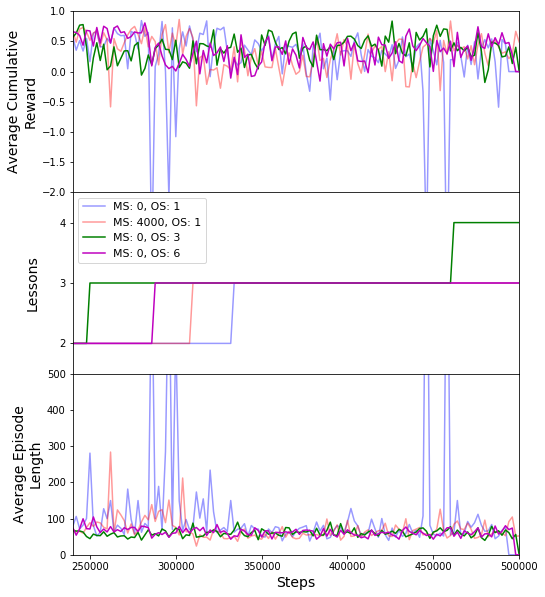

In [275]:
fig,(ax,bx,cx) = plt.subplots(3,1,figsize=(8,10),gridspec_kw = {'wspace':0, 'hspace':0})#sharex=True
cx.locator_params(axis='x', nbins=6)
bx.locator_params(axis='y', nbins=5)

# Plotting the ACR
CLSDO_WOMS_csv.loc[[1]].T.plot(ax=ax,c='blue',alpha =0.4)
CLSDO_WMS_csv.loc[1].T.plot(ax=ax,c='red',alpha=0.4)
CLSDO_WOMS_VS3.loc[[1]].T.plot(ax=ax,c='green')
# CLSDO_WOMS_VS6b.loc[[1]].T.plot(ax=ax,c='orange',linestyle='dashed')
CLSDO_WOMS_VS6g.loc[[1]].T.plot(ax=ax,c='m')

# Second plot, changes in lessons
CLSDO_WOMS_csv.loc[3].T.plot(ax=bx,c='blue',alpha=0.4)
CLSDO_WMS_csv.loc[3].T.plot(ax=bx,c='red',alpha=0.4)
CLSDO_WOMS_VS3.loc[[3]].T.plot(ax=bx,c='green')
# CLSDO_WOMS_VS6b.loc[[3]].T.plot(ax=bx,c='orange',linestyle='dashed')
CLSDO_WOMS_VS6g.loc[[3]].T.plot(ax=bx,c='m')

# Third plot, AEL
CLSDO_WOMS_csv.loc[[2]].T.plot(ax=cx,c="blue",alpha=0.4)
CLSDO_WMS_csv.loc[2].T.plot(ax=cx,c="red",alpha=0.4)
CLSDO_WOMS_VS3.loc[[2]].T.plot(ax=cx,c='green')
# CLSDO_WOMS_VS6b.loc[[2]].T.plot(ax=cx,c='orange',linestyle='dashed')
CLSDO_WOMS_VS6g.loc[[2]].T.plot(ax=cx,c='m')

# Disabling the irrelvant x-axis
ax.get_xaxis().set_visible(False)
bx.get_xaxis().set_visible(False)

# Specifying the legends
bx.legend(['MS: 0, OS: 1','MS: 4000, OS: 1',
           'MS: 0, OS: 3','MS: 0, OS: 6'],fontsize=11)#,bbox_to_anchor=(1.3,1)
ax.get_legend().remove()
cx.get_legend().remove()

# Add y-labels
ax.set_ylabel("Average Cumulative\nReward",fontsize=14)
ax.set_ylim((-2,1))
bx.set_ylabel("Lessons\n ",fontsize=14)
bx.set_ylim(1.5,4.5)
cx.set_ylabel("Average Episode\nLength",fontsize=14)
cx.set_xlabel("Steps",fontsize=14)
cx.set_ylim((0,500))

# Controling the tick labels
# cx.set_xlim()
# cx.set_xticklabels(np.arange(240000,565000,65000).astype(int))
# plt.savefig("graphs/EffectOfObsStacking.jpg",bbox_inches="tight")
plt.show()

In [4]:
availableFolders

{0: 'Baseline-1.0',
 1: 'Baseline-1.0.1',
 2: 'Baseline-1.1',
 3: 'Baseline-1.1.2',
 4: 'Baseline-1.2',
 5: 'Baseline-1.3',
 6: 'CcCLStaticDynamic-1.8',
 7: 'CLStaticDynamicObstacles-1.0',
 8: 'CLStaticDynamicObstacles-1.0.1',
 9: 'CLStaticDynamicObstacles-1.0.2',
 10: 'CLStaticDynamicObstacles-1.0.3',
 11: 'CLStaticDynamicObstacles-1.0.4',
 12: 'CLStaticDynamicObstacles-1.0.5',
 13: 'CLStaticDynamicObstacles-1.0.5.1',
 14: 'CLStaticDynamicObstacles-1.1',
 15: 'CLStaticDynamicObstacles-1.7',
 16: 'CLStaticDynamicObstacles-1.8',
 17: 'CLStaticDynamicVS3',
 18: 'CLStaticDynamicVS6-1',
 19: 'FullSetUpCertain-1.0',
 20: 'FullSetUpCertain-1.1',
 21: 'FullSetUpCertain-1.1.1',
 22: 'FullSetUpCertain-1.1.2',
 23: 'FullSetUpCertain-1.1.2.1',
 24: 'FullSetUpCertain-1.1.3',
 25: 'FullSetUpCertain-1.1.3.1',
 26: 'FullSetUpCertain-1.2',
 27: 'FullSetUpCertain-1.3',
 28: 'FullSetUpCertain-2.0',
 29: 'FullSetUpCertain-2.1',
 30: 'FullSetUpCertain-2.2',
 31: 'RewardShaping-1.0',
 32: 'RewardShaping-1.

In [5]:
holder = []

for i,file in enumerate([8,15,17,18]): #<- Choose from above 
    
    path = "../../Exported_Data/"+availableFolders[file]
    files = [file for file in os.listdir(path) if '.meta' not in file]
#     if i == 0:
#         print("This is the available files\n\n",files)
    print("This is the available files\n\n",files,'\n')
        
    # Reading in the data.
    with open(path+"/"+files[0],"r") as file:
        content = file.readlines()
        
    cleanContent = [re.split(",",re.sub("[\n ]","",obs))[0] for obs in content]
    cleanContent = np.array(cleanContent).astype(int)
    holder.append(cleanContent)

This is the available files

 ['posCount.txt', 'sensorCloudCount.txt', 'stepsToGoal.txt', 'stepsToGoal_alt.txt'] 

This is the available files

 ['posCount.txt', 'sensorCloudCount.txt', 'stepsToGoal.txt', 'stepsToGoal_alt.txt', 'stepsToGoal_fix_up.txt', 'stepsToGoal_up.txt'] 

This is the available files

 ['Area_Env4_2-3_pedCount.txt', 'Area_Env4_2-3_sensorCloudCount.txt', 'Area_Env4_2-3_stepsToGoal.txt'] 

This is the available files

 ['Area_Env4_2-3_pedCount.txt', 'Area_Env4_2-3_sensorCloudCount.txt', 'Area_Env4_2-3_stepsToGoal.txt'] 



In [6]:
path = "../../Exported_Data/"+availableFolders[21]
files = os.listdir(path)

In [7]:
for subfile in files:
    with open(path+"/"+subfile,"r") as file:
        content = file.readlines()
    
    cleanContent = [re.split(",",re.sub("[\n ]","",obs)) for obs in content]
    
    if len(cleanContent[0])>2:
        
        cleanContent = [int(content[1]) for content in cleanContent]
    
    print(len(cleanContent))
    print(max(cleanContent))

4983
['0']
676
['9', '9']
6111
4005
4724
['0']
710
['94', '94']
5924
4005
4731
['0']
781
['9', '9']
5955
4005
4332
['0']
793
['9', '9']
5646
4005


In [8]:
for file in holder:
    print("The number of observations are: %i\nThe number of observations in lesson 3 or above are: %i\nThe number of collisions are: %i\n The fraction are: %.3f\n" % \
          (len(file),(len(file)-np.arange(len(file))[file==1][0]),
           sum(file),(sum(file)/(len(file)-np.arange(len(file))[file==1][0]))))

The number of observations are: 7487
The number of observations in lesson 3 or above are: 2458
The number of collisions are: 524
 The fraction are: 0.213

The number of observations are: 7712
The number of observations in lesson 3 or above are: 3393
The number of collisions are: 893
 The fraction are: 0.263

The number of observations are: 8375
The number of observations in lesson 3 or above are: 4393
The number of collisions are: 841
 The fraction are: 0.191

The number of observations are: 8463
The number of observations in lesson 3 or above are: 3698
The number of collisions are: 868
 The fraction are: 0.235



In [9]:
for file in holder:
    print(1-np.arange(len(file))[file==1][0]/len(file))

0.32830239081073864
0.4399636929460581
0.5245373134328358
0.4369608885737918


### Parallel training

### Tensorboard data

In [170]:
fileDict = {i: file for i,file in enumerate(os.listdir("../../summaries_for_processing/GoalBrain_4_2/csv_output"))}
fileDict

{0: 'CcCLStaticDynamic-1.8-0.csv',
 1: 'CcCLStaticDynamic-1.8-0.txt',
 2: 'CLStaticDynamicObstacles-1.0-0.csv',
 3: 'CLStaticDynamicObstacles-1.0-0.txt',
 4: 'CLStaticDynamicObstacles-1.1-0.csv',
 5: 'CLStaticDynamicObstacles-1.1-0.txt',
 6: 'CLStaticDynamicObstacles-1.2-0.csv',
 7: 'CLStaticDynamicObstacles-1.2-0.txt',
 8: 'CLStaticDynamicObstacles-1.3-0.csv',
 9: 'CLStaticDynamicObstacles-1.3-0.txt',
 10: 'CLStaticDynamicObstacles-1.4-0.csv',
 11: 'CLStaticDynamicObstacles-1.4-0.txt',
 12: 'CLStaticDynamicObstacles-1.6-0.csv',
 13: 'CLStaticDynamicObstacles-1.6-0.txt',
 14: 'CLStaticDynamicObstacles-1.7-0.csv',
 15: 'CLStaticDynamicObstacles-1.7-0.txt',
 16: 'CLStaticDynamicObstacles-1.8-0.csv',
 17: 'CLStaticDynamicObstacles-1.8-0.txt',
 18: 'CLStaticDynamicObstacles.1.0.1-0.csv',
 19: 'CLStaticDynamicObstacles.1.0.1-0.txt',
 20: 'CLStaticDynamicObstacles.1.0.2-0.csv',
 21: 'CLStaticDynamicObstacles.1.0.2-0.txt',
 22: 'CLStaticDynamicObstacles.1.5-0.csv',
 23: 'CLStaticDynamicObstac

In [171]:
# CsCLStaticDynamic-1.8
CcCLSD_1_8 = pd.read_csv("../../summaries_for_processing/GoalBrain_4_2/csv_output/"+fileDict[0], index_col=0,na_values=0).fillna(0)
# CLStaticDynamicObstacles-1.1-0
CLSDO_1_1 = pd.read_csv("../../summaries_for_processing/GoalBrain_4_2/csv_output/"+fileDict[18], index_col=0,na_values=0).fillna(0)

In [172]:
CcCLSD_1_8

,2000.0,4000.0,6000.0,8000.0,10000.0,12000.0,14000.0,16000.0,18000.0,20000.0,...,482000.0,484000.0,486000.0,488000.0,490000.0,492000.0,494000.0,496000.0,498000.0,500000.0
1,-1.003992,-1.003254,-0.992994,-0.826717,-0.379789,-0.265759,-0.183417,-0.135135,0.051364,0.455599,...,0.466351,0.426307,0.654239,0.350396,0.499889,0.396694,0.413740,0.299963,0.424739,2.124998e-02
2,17.625000,22.603550,45.101795,69.817390,112.478874,134.875000,180.033340,194.594589,204.909088,93.816902,...,69.315315,59.780304,68.704346,63.174999,72.610619,60.677418,64.425194,56.485294,70.104347,6.483334e+01
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,4.000000,4.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000e+00
4,0.621826,0.206813,0.132849,0.095714,0.073192,0.053025,0.046436,0.036699,0.033059,0.032420,...,0.009920,0.009255,0.008974,0.010204,0.010957,0.009729,0.009964,0.010183,0.010435,1.027053e-02
5,0.098798,0.094278,0.099518,0.103796,0.104497,0.099097,0.091627,0.082082,0.073894,0.088190,...,0.053374,0.053590,0.051178,0.055402,0.055053,0.054104,0.055551,0.055316,0.056162,5.626069e-02
6,0.027516,0.026351,0.022802,0.028042,0.025327,0.025642,0.021509,0.026819,0.023153,0.027974,...,0.021157,0.024003,0.021358,0.022969,0.021154,0.022655,0.021173,0.020552,0.026347,2.366788e-02
7,0.464631,0.173736,0.098380,0.068476,0.061425,0.044995,0.034331,0.026455,0.028788,0.041219,...,0.032563,0.041562,0.033874,0.041125,0.038520,0.054228,0.041537,0.039798,0.036461,4.887008e-02
8,0.029562,0.096648,0.124707,0.137638,0.154544,0.151823,0.179359,0.157668,0.138690,0.067073,...,0.014324,0.011155,0.012433,0.013378,0.015969,0.011672,0.013488,0.012020,0.013895,1.389919e-02
9,1.419066,1.417449,1.413707,1.407899,1.401266,1.397260,1.393178,1.390575,1.388031,1.385845,...,1.206071,1.206033,1.205994,1.205980,1.205962,1.205935,1.205879,1.205838,1.205819,1.205810e+00
10,0.000299,0.000298,0.000297,0.000296,0.000295,0.000293,0.000292,0.000291,0.000290,0.000289,...,0.000011,0.000010,0.000009,0.000008,0.000007,0.000005,0.000004,0.000003,0.000002,5.998006e-07


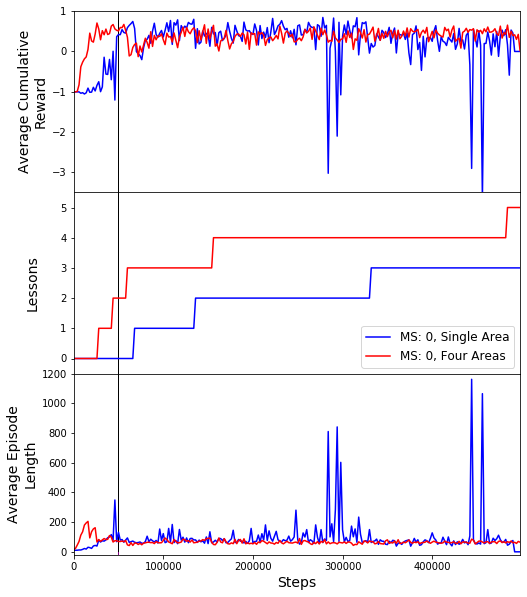

In [282]:
fig,(ax,bx,cx) = plt.subplots(3,1,figsize=(8,10),gridspec_kw = {'wspace':0, 'hspace':0})#sharex=True
plt.locator_params(axis='x', nbins=5)
ax.locator_params(axis='y', nbins=5)

# Plotting the ACR
CLSDO_1_1.loc[[1]].T.plot(ax=ax,c='blue')
CcCLSD_1_8.loc[1].T.plot(ax=ax,c='red')
# Adding a black line to indicate comparison period
# ax.plot([(-4,100),(1,100)],color='k',ls=':')#,width=0.3
ax.bar(25,-4,color='k',width=0.3,linestyle='dashed')
ax.bar(25,1,color='k',width=0.3,linestyle='dashed')

# Second plot, changes in lessons
CLSDO_1_1.loc[3].T.plot(ax=bx,c='blue')
CcCLSD_1_8.loc[3].T.plot(ax=bx,c='red')
# Adding a black line to indicate comparison period
bx.bar(25,-1,color='k',width=0.3,linestyle='dashed')
bx.bar(25,6,color='k',width=0.3,linestyle="dashed")


# Third plot, AEL
CLSDO_1_1.loc[[2]].T.plot(ax=cx,c="blue")
CcCLSD_1_8.loc[2].T.plot(ax=cx,c="red")
# Adding a black line to indicate comparison period
cx.bar(25,-20,color='purple',width=0.3,linestyle='--')
cx.bar(25,1500,color='k',width=0.3,linestyle='--')

# Disabling the irrelvant x-axis
ax.get_xaxis().set_visible(False)
bx.get_xaxis().set_visible(False)

# Controling the tick labels
cx.set_xticklabels(np.arange(0,500000,100000).astype(str))

# Specifying the legends
ax.get_legend().remove()
bx.legend(['MS: 0, Single Area','MS: 0, Four Areas'],fontsize=12,loc=4)#,bbox_to_anchor=(1.3,1)
cx.get_legend().remove()

# Add y-labels
ax.set_ylabel("Average Cumulative\nReward",fontsize=14)
ax.set_ylim(-3.5,1)
bx.set_ylabel("Lessons\n ",fontsize=14)
bx.set_ylim(-0.5,5.5)
cx.set_ylabel("Average Episode\nLength",fontsize=14)
cx.set_xlabel("Steps",fontsize=14)
cx.set_ylim(-20,1200)

# plt.savefig("graphs/EffectOfParallelisation.jpg",bbox_inches="tight")
plt.show()

### Custom data

In [240]:
availableFolders

{0: 'BaseEnvironmentNoCurriculum',
 1: 'BaseEnvironmentNoCurriculum-1.1-0',
 2: 'BaseEnvironmentNoCurriculum-1.1.1-0',
 3: 'BaseEnvironmentNoCurriculum-1.2-0',
 4: 'CcCLStaticDynamic-1.8',
 5: 'CLStaticDynamicObstacles-1.0',
 6: 'CLStaticDynamicObstacles-1.0.1',
 7: 'CLStaticDynamicObstacles-1.0.2',
 8: 'CLStaticDynamicObstacles-1.1',
 9: 'CLStaticDynamicObstacles-1.2',
 10: 'CLStaticDynamicObstacles-1.3',
 11: 'CLStaticDynamicObstacles-1.4',
 12: 'CLStaticDynamicObstacles-1.5',
 13: 'CLStaticDynamicObstacles-1.6',
 14: 'CLStaticDynamicObstacles-1.7',
 15: 'CLStaticDynamicObstacles-1.8',
 16: 'CLStaticDynamicVS3',
 17: 'CLStaticDynamicVS6',
 18: 'CLStaticDynamicVS6-1',
 19: 'CurriculumLearning',
 20: 'RewardShaping-1.0'}

In [241]:
path = "../../Exported_Data/"+availableFolders[4]# <- Choose the folders from above

In [242]:
files = [file for file in os.listdir(path) if "meta" not in file]
files

['Area_Env4_2-0_pedCount.txt',
 'Area_Env4_2-0_sensorCloudCount.txt',
 'Area_Env4_2-0_stepsToGoal.txt',
 'Area_Env4_2-1_pedCount.txt',
 'Area_Env4_2-1_sensorCloudCount.txt',
 'Area_Env4_2-1_stepsToGoal.txt',
 'Area_Env4_2-2_pedCount.txt',
 'Area_Env4_2-2_sensorCloudCount.txt',
 'Area_Env4_2-2_stepsToGoal.txt',
 'Area_Env4_2-3_pedCount.txt',
 'Area_Env4_2-3_sensorCloudCount.txt',
 'Area_Env4_2-3_stepsToGoal.txt']

In [93]:
stepFiles = [file for file in files if "step" in file]
pedFiles = [file for file in files if "ped" in file]

In [247]:
episodeLenHolder = []
goalHolder = []
DAHolder = []

for stepFile in stepFiles:

# Reading in the data.
    with open(path+"/"+stepFile,"r") as file:
        content = file.readlines()
    # #### For maximum-steps data ##############
    goal,episodeLength,difficultArea = [],[],[]

    for obs in content:
        cleanObs = re.split(",",re.sub("[\n ]","",obs))

        episodeLength.append(int(cleanObs[1]))
        goal.append(int(cleanObs[0]))
        difficultArea.append(int(cleanObs[2]))

    if len(episodeLength) != len(goal):
        print("The number of observations in steps_act are: %i" % len(episodeLength))
        print("The number of observations in steps_obs are: %i" % len(goal))
    else:
        print("The number of observations in both are: %i" % len(episodeLength))
    
    episodeLenHolder.append(np.array(episodeLength))
    goalHolder.append(np.array(goal))
    DAHolder.append(np.array(difficultArea))
    

The number of observations in both are: 8257
The number of observations in both are: 8248
The number of observations in both are: 8100
The number of observations in both are: 7793


In [248]:
averageArrayLen = np.array([len(array) for array in episodeLenHolder])

In [249]:
averageEpisodeLen = np.array([env.mean() for env in episodeLenHolder])

In [250]:
averageEpisodeLen

array([301.1604699 , 301.28031038, 305.7108642 , 317.64622097])

In [251]:
averageEpisodeLen.mean()

306.4494663619157

In [252]:
averageArrayLen.mean()

8099.5

In [253]:
episodeLenHolderTrans = [[obs if obs > averageEpisodeLen.mean() else 0 for obs in data] for data in episodeLenHolder]

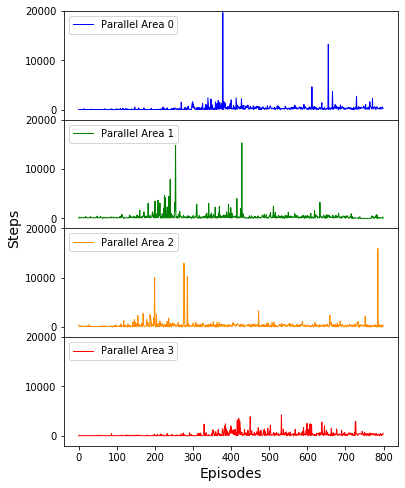

In [310]:
fig,(ax,bx,cx,dx) = plt.subplots(4,1,sharex=True,sharey=True,figsize=(6,8),gridspec_kw = {'wspace':0, 'hspace':0})
plt.locator_params(axis='y', nbins=4)
containers = [ax,bx,cx,dx]
colors = ['blue','green','darkorange','red']

for i,subplot in enumerate(containers):
    subplot.plot(episodeLenHolder[i][0:800],
                 color = colors[i],linewidth=1,label=("Parallel Area "+str(i)))
plt.ylim(-2000,20000)
cx.set_ylabel('Steps',position=(1,1),fontsize=14)
dx.set_xlabel('Episodes',fontsize=14)
ax.legend(loc=2)
bx.legend(loc=2)
cx.legend(loc=2)
dx.legend(loc=2)
# plt.yscale("log")
# plt.savefig("graphs/EffectOfParallelisation_sub.jpg",bbox_inches="tight")
plt.show()

### Reward shaping

In [311]:
fileDict = {i: file for i,file in enumerate(os.listdir("../../summaries_for_processing/GoalBrain_4_2/csv_output"))}
fileDict

{0: 'CcCLStaticDynamic-1.8-0.csv',
 1: 'CcCLStaticDynamic-1.8-0.txt',
 2: 'CLStaticDynamicObstacles-1.0-0.csv',
 3: 'CLStaticDynamicObstacles-1.0-0.txt',
 4: 'CLStaticDynamicObstacles-1.1-0.csv',
 5: 'CLStaticDynamicObstacles-1.1-0.txt',
 6: 'CLStaticDynamicObstacles-1.2-0.csv',
 7: 'CLStaticDynamicObstacles-1.2-0.txt',
 8: 'CLStaticDynamicObstacles-1.3-0.csv',
 9: 'CLStaticDynamicObstacles-1.3-0.txt',
 10: 'CLStaticDynamicObstacles-1.4-0.csv',
 11: 'CLStaticDynamicObstacles-1.4-0.txt',
 12: 'CLStaticDynamicObstacles-1.6-0.csv',
 13: 'CLStaticDynamicObstacles-1.6-0.txt',
 14: 'CLStaticDynamicObstacles-1.7-0.csv',
 15: 'CLStaticDynamicObstacles-1.7-0.txt',
 16: 'CLStaticDynamicObstacles-1.8-0.csv',
 17: 'CLStaticDynamicObstacles-1.8-0.txt',
 18: 'CLStaticDynamicObstacles.1.0.1-0.csv',
 19: 'CLStaticDynamicObstacles.1.0.1-0.txt',
 20: 'CLStaticDynamicObstacles.1.0.2-0.csv',
 21: 'CLStaticDynamicObstacles.1.0.2-0.txt',
 22: 'CLStaticDynamicObstacles.1.5-0.csv',
 23: 'CLStaticDynamicObstac

In [313]:
# RewardShaping-1.1
RSMS0 = pd.read_csv("../../summaries_for_processing/GoalBrain_4_2/csv_output/"+fileDict[30], index_col=0,na_values=0).fillna(0)
# RewardShaping-1.2
RSMS4000 = pd.read_csv("../../summaries_for_processing/GoalBrain_4_2/csv_output/"+fileDict[32], index_col=0,na_values=0).fillna(0)
# CLStaticDynamicObstacles-1.1-0
CLSDO_1_1 = pd.read_csv("../../summaries_for_processing/GoalBrain_4_2/csv_output/"+fileDict[18], index_col=0,na_values=0).fillna(0)

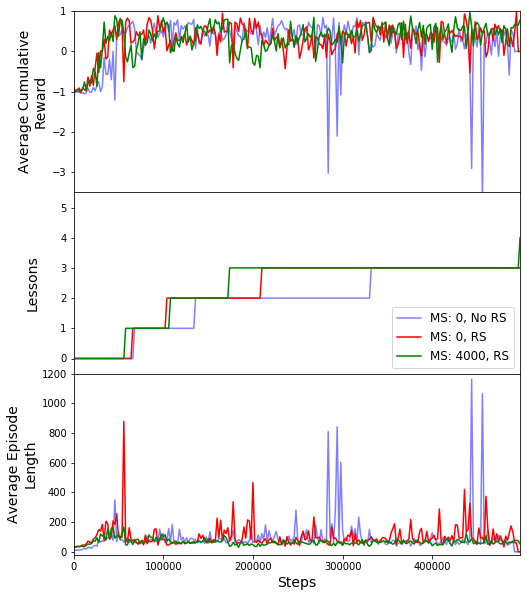

In [320]:
fig,(ax,bx,cx) = plt.subplots(3,1,figsize=(8,10),gridspec_kw = {'wspace':0, 'hspace':0})#sharex=True
plt.locator_params(axis='x', nbins=5)
ax.locator_params(axis='y', nbins=5)

# Plotting the ACR
CLSDO_1_1.loc[[1]].T.plot(ax=ax,c='blue',alpha=0.5)
RSMS0.loc[1].T.plot(ax=ax,c='red')
RSMS4000.loc[1].T.plot(ax=ax,c='g')

# Second plot, changes in lessons
CLSDO_1_1.loc[[3]].T.plot(ax=bx,c='blue',alpha=0.5)
RSMS0.loc[3].T.plot(ax=bx,c='red')
RSMS4000.loc[3].T.plot(ax=bx,c='g')

# Third plot, AEL
CLSDO_1_1.loc[2].T.plot(ax=cx,c='blue',alpha=0.5)
RSMS0.loc[2].T.plot(ax=cx,c='red')
RSMS4000.loc[2].T.plot(ax=cx,c='g')

# Disabling the irrelvant x-axis
ax.get_xaxis().set_visible(False)
bx.get_xaxis().set_visible(False)

# Controling the tick labels
cx.set_xticklabels(np.arange(0,500000,100000).astype(str))

# Specifying the legends
ax.get_legend().remove()
bx.legend(['MS: 0, No RS','MS: 0, RS','MS: 4000, RS'],fontsize=12,loc=4)#,bbox_to_anchor=(1.3,1)
# cx.get_legend().remove()

# Add y-labels
ax.set_ylabel("Average Cumulative\nReward",fontsize=14)
ax.set_ylim(-3.5,1)
bx.set_ylabel("Lessons\n ",fontsize=14)
bx.set_ylim(-0.5,5.5)
cx.set_ylabel("Average Episode\nLength",fontsize=14)
cx.set_xlabel("Steps",fontsize=14)
cx.set_ylim(-20,1200)

# plt.savefig("graphs/EffectOfParallelisation.jpg",bbox_inches="tight")
plt.show()

In [326]:
availableFolders

{0: 'BaseEnvironmentNoCurriculum',
 1: 'BaseEnvironmentNoCurriculum-1.1-0',
 2: 'BaseEnvironmentNoCurriculum-1.1.1-0',
 3: 'BaseEnvironmentNoCurriculum-1.2-0',
 4: 'CcCLStaticDynamic-1.8',
 5: 'CLStaticDynamicObstacles-1.0',
 6: 'CLStaticDynamicObstacles-1.0.1',
 7: 'CLStaticDynamicObstacles-1.0.2',
 8: 'CLStaticDynamicObstacles-1.1',
 9: 'CLStaticDynamicObstacles-1.2',
 10: 'CLStaticDynamicObstacles-1.3',
 11: 'CLStaticDynamicObstacles-1.4',
 12: 'CLStaticDynamicObstacles-1.5',
 13: 'CLStaticDynamicObstacles-1.6',
 14: 'CLStaticDynamicObstacles-1.7',
 15: 'CLStaticDynamicObstacles-1.8',
 16: 'CLStaticDynamicVS3',
 17: 'CLStaticDynamicVS6',
 18: 'CLStaticDynamicVS6-1',
 19: 'CurriculumLearning',
 20: 'RewardShaping-1.0',
 21: 'RewardShaping-1.1',
 22: 'RewardShaping-1.2'}

In [337]:
episodeLenHolder = []
goalHolder = []
DAHolder = []

for i,file in enumerate([21,22]): #<- Choose from above 
    
    path = "../../Exported_Data/"+availableFolders[file]
    files = [file for file in os.listdir(path) if '.meta' not in file]
#     if i == 0:
#         print("This is the available files\n\n",files)
    print("This is the available files\n\n",files,'\n')
        
    # Reading in the data.
    with open(path+"/"+files[2],"r") as file:
        content = file.readlines()
        
    cleanContent = [re.split(",",re.sub("[\n ]","",obs)) for obs in content]
    
    goal = np.array([int(obs[0]) for obs in cleanContent])
    epiLen = np.array([int(obs[1]) for obs in cleanContent])
    da = np.array([int(obs[2]) for obs in cleanContent])
#     cleanContent = np.array(cleanContent).astype(int)
#     holder.append(cleanContent)
    episodeLenHolder.append(epiLen)
    goalHolder.append(goal)
    DAHolder.append(da)

This is the available files

 ['Area_Env4_2-3_pedCount.txt', 'Area_Env4_2-3_sensorCloudCount.txt', 'Area_Env4_2-3_stepsToGoal.txt'] 

This is the available files

 ['Area_Env4_2-3_pedCount.txt', 'Area_Env4_2-3_sensorCloudCount.txt', 'Area_Env4_2-3_stepsToGoal.txt'] 



In [330]:
DAHolder

[array([0, 0, 0, ..., 0, 0, 1]), array([0, 0, 0, ..., 1, 0, 1])]

In [344]:
for array1,array2,array3 in zip(DAHolder,goalHolder,episodeLenHolder):
    stateDA, shareDA = np.unique(np.array(array1),return_counts=True)
    print("Share of obs in the DA: %.3f" % (shareDA[1]/sum(shareDA)))
    print(shareDA)
    # Keeping those where the target actually is located in the difficult area
    daObs = np.array(array1)[np.array(array1)==1]
    goalDAObs = np.array(array2)[np.array(array1)==1]
    episodeLenDAObs = np.array(array3)[np.array(array1)==1]
    
    goalDA = [1 if (i == 1) and (j ==1) else 0 for i,j in zip(daObs,goalDAObs) ]
    state,freq = np.unique(goalDA,return_counts=True)
    print("Frequency: %.3f" % (freq[1]/sum(freq)))
    print(freq,"\n")

Share of obs in the DA: 0.122
[5507  768]
Frequency: 0.443
[428 340] 

Share of obs in the DA: 0.106
[7386  878]
Frequency: 0.548
[397 481] 

